In [1]:
# Import the necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

# Re-size all the images to this size
IMAGE_SIZE = [224, 224]

# Relative paths for train and validation datasets
train_path = '../Datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../Datasets/New Plant Diseases Dataset(Augmented)/valid'

# Load VGG16 pre-trained model (without the top layers)
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the existing weights
for layer in vgg16.layers:
    layer.trainable = False

# Get the number of output classes
folders = glob(train_path + '/*')

# Add custom layers
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model object
model = Model(inputs=vgg16.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preprocessing for the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Epoch 1/10
574/574 [==============================] - 5034s 9s/step - loss: 0.7360 - accuracy: 0.7553 - val_loss: 0.5095 - val_accuracy: 0.8312
Epoch 2/10
574/574 [==============================] - 6451s 11s/step - loss: 0.4141 - accuracy: 0.8620 - val_loss: 0.5099 - val_accuracy: 0.8362
Epoch 3/10
574/574 [==============================] - 5786s 10s/step - loss: 0.3379 - accuracy: 0.8873 - val_loss: 0.2950 - val_accuracy: 0.9003
Epoch 4/10
574/574 [==============================] - 5031s 9s/step - loss: 0.2913 - accuracy: 0.9018 - val_loss: 0.4237 - val_accuracy: 0.8624
Epoch 5/10
574/574 [==============================] - 5465s 10s/step - loss: 0.2654 - accuracy: 0.9074 - val_loss: 0.3707 - val_accuracy: 0.8824
Epoch 6/10
574/574 [==============================] - 6835s 12s/step - loss: 0.2432 - accuracy: 0.9195 - val_loss: 0.4901 - val_accuracy: 0.8578
Epoch 7/10
574/574 [=========================

In [3]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

144/144 [==============================] - 361s 3s/step - loss: 0.2572 - accuracy: 0.9261
Validation Loss: 0.25723394751548767
Validation Accuracy: 0.9260632395744324


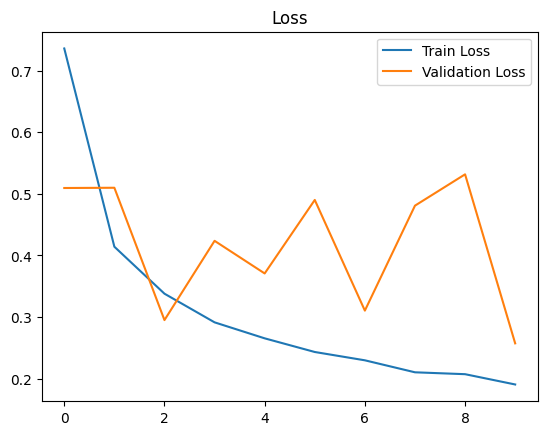

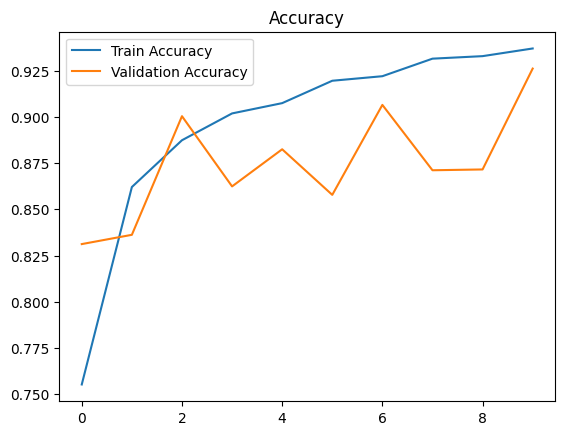

In [4]:
# Importing matplotlib to plot the results
import matplotlib.pyplot as plt

# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [5]:
model.save('../Models/VGG_model.h5')